<a href="https://colab.research.google.com/github/Teasotea/IntelectualDataAnalysis/blob/main/lab3/IAD_Lab3_datasetA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Лабораторна робота №3.

### Завдання
Початкові дані (два набори) і Хід виконання роботи такі ж як для Лабораторної роботи №2.
У кого в роботі №2 була класифікація, той у роботі №3 використовує `sklearn.neural_network.MLPClassifier.`

Почати з одношарової моделі нейронної мережі і визначити чи достатньо буде одношарової моделі для даних. Перевірте скільки нейронів в одношаровій моделі буде достатньо для задовільного розв'язання задачі бінарної класифікації.

# Import Libraries & Load Data

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns

from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_blobs
from sklearn import tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import OneHotEncoder

In [21]:
from itertools import cycle
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.metrics import average_precision_score
from sklearn.model_selection import GridSearchCV

In [22]:
# dataset A
X1, Y1 = make_blobs(n_samples=400, centers=4, cluster_std=0.60, random_state=0)

rng = np.random.RandomState(13)
X_stretched = np.dot(X1, rng.randn(2,2))

In [23]:
X1 = pd.DataFrame(X_stretched)
Y1 = pd.DataFrame(Y1)

In [24]:
X1.shape, Y1.shape

((400, 2), (400, 1))

In [25]:
data = pd.concat([X1,Y1], axis=1, join="inner")
data.columns = ['X1','X2','Y']
data.head()

,X1,X2,Y
0,-0.466891,3.119969,3
1,1.809786,-0.894205,2
2,1.929417,-0.799470,2
3,-0.692774,2.479103,0
4,1.700245,-0.833930,2


# Exploratory Data Analysis (Data Visualization)

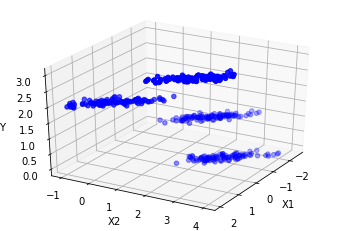

In [26]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(data['X1'].to_numpy(), data['X2'].to_numpy(), data['Y'].to_numpy(), c="b")
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')
ax.view_init(elev=30, azim = 30)
plt.show()

In [ ]:
data.describe()

,X1,X2,Y
count,400.000000,400.000000,400.000000
mean,-0.180275,1.790700,1.500000
std,1.089922,1.165162,1.119434
min,-2.468680,-0.995971,0.000000
25%,-1.174293,1.098780,0.750000
50%,-0.207917,2.122293,1.500000
75%,0.767063,2.649584,2.250000
max,1.967884,4.021044,3.000000


Дізнаємося, які класи присутні в даних

In [ ]:
data['Y'].value_counts()

3    100
2    100
0    100
1    100
Name: Y, dtype: int64

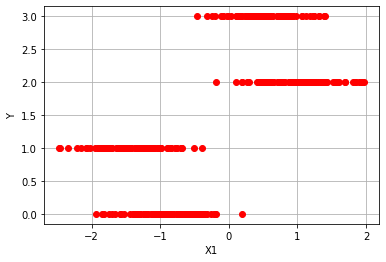

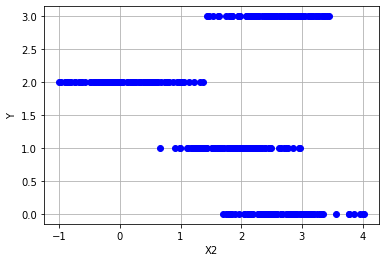

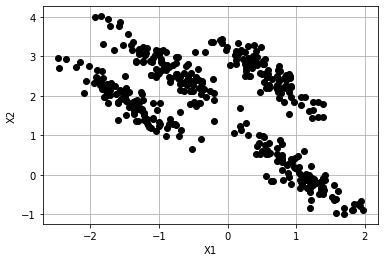

In [ ]:
plt.plot(data.X1, data.Y, 'ro', label = 'X1, Y')
plt.xlabel('X1')
plt.ylabel('Y')
plt.grid(True)
plt.show()

plt.plot(data.X2, data.Y, 'bo', label = 'X2, Y')
plt.xlabel('X2')
plt.ylabel('Y')
plt.grid(True)
plt.show()

plt.plot(data.X1, data.X2, 'ko', label = 'X1, X2')
plt.xlabel('X1')
plt.ylabel('X2')
plt.grid(True)
plt.show()

In [ ]:
data.corr()

,X1,X2,Y
X1,1.000000,-0.588064,0.692763
X2,-0.588064,1.000000,-0.212406
Y,0.692763,-0.212406,1.000000


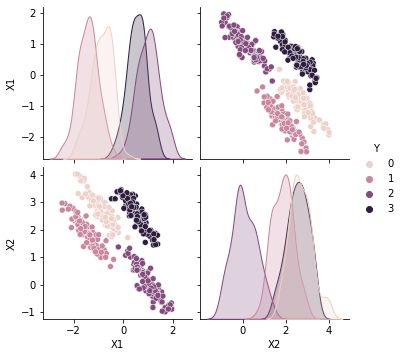

In [ ]:
sns.pairplot(data=data, hue='Y')
plt.show()

# Split data into train and test

In [55]:
def split_data(X, y, fraction):
    split = np.random.rand(X.shape[0]) > fraction

    X_Train = X[split]
    y_Train = y[split]
    X_Test =  X[~split]
    y_Test = y[~split]

    return X_Train, y_Train, X_Test, y_Test

In [56]:
X_Train, y_Train, X_Test, y_Test = split_data(data[['X1', 'X2']], data['Y'], fraction = 0.1)

In [57]:
X_Train.shape, y_Train.shape, X_Test.shape, y_Test.shape

((359, 2), (359,), (41, 2), (41,))

# Train Model

In [62]:
model = MLPClassifier()
model.fit(X_Train, y_Train)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


MLPClassifier()

# Predict

In [28]:
predictions = model.predict(X_Test)

In [29]:
pred_score = model.predict_proba(X_Test)

In [30]:
print(accuracy_score(y_Test, predictions))

0.9791666666666666


# Cross-validation 

In [31]:
accuracy = cross_val_score(model, data[['X1', 'X2']], data['Y'], scoring='accuracy', cv = 10)
print(accuracy)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multi

[0.975 0.95  1.    1.    1.    1.    1.    1.    1.    0.95 ]


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


In [33]:
print(accuracy.mean())

0.9875


# Evaluation

• confusion matrix

• precision

• recall

• F1 score

• побудувати криву точностi-повноти (precision-recall (PR) curve), ROC-криву, показник AUC.

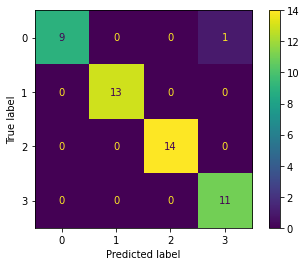

In [37]:
cm = confusion_matrix(y_Test, predictions, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)
disp.plot()
plt.show()

In [38]:
print(classification_report(y_Test, predictions))

              precision    recall  f1-score   support

           0       1.00      0.90      0.95        10
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        14
           3       0.92      1.00      0.96        11

    accuracy                           0.98        48
   macro avg       0.98      0.97      0.98        48
weighted avg       0.98      0.98      0.98        48



In [39]:
encoder = OneHotEncoder(sparse=False)
y_test = encoder.fit_transform(np.array(y_Test).reshape(-1, 1))

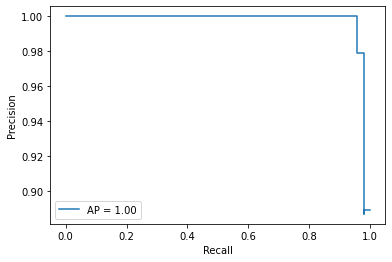

In [40]:
precision = dict()
recall = dict()
n_classes=4
average_precision = dict()
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_test[:, i], pred_score[:, i])
    average_precision[i] = average_precision_score(y_test[:, i], pred_score[:, i])

precision["micro"], recall["micro"], _ = precision_recall_curve(
    y_test.ravel(), pred_score.ravel()
)
average_precision["micro"] = average_precision_score(y_test, pred_score, average="micro")


display = PrecisionRecallDisplay(
    recall=recall["micro"],
    precision=precision["micro"],
    average_precision=average_precision["micro"],
)
display.plot()

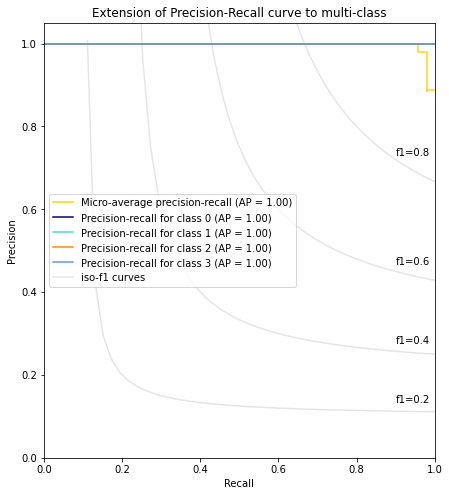

In [41]:
_ = display.ax_.set_title("Micro-averaged over all classes")

colors = cycle(["navy", "turquoise", "darkorange", "cornflowerblue", "teal"])

_, ax = plt.subplots(figsize=(7, 8))

f_scores = np.linspace(0.2, 0.8, num=4)
lines, labels = [], []
for f_score in f_scores:
    x = np.linspace(0.01, 1)
    y = f_score * x / (2 * x - f_score)
    (l,) = plt.plot(x[y >= 0], y[y >= 0], color="gray", alpha=0.2)
    plt.annotate("f1={0:0.1f}".format(f_score), xy=(0.9, y[45] + 0.02))

display = PrecisionRecallDisplay(
    recall=recall["micro"],
    precision=precision["micro"],
    average_precision=average_precision["micro"],
)
display.plot(ax=ax, name="Micro-average precision-recall", color="gold")

for i, color in zip(range(n_classes), colors):
    display = PrecisionRecallDisplay(
        recall=recall[i],
        precision=precision[i],
        average_precision=average_precision[i],
    )
    display.plot(ax=ax, name=f"Precision-recall for class {i}", color=color)


handles, labels = display.ax_.get_legend_handles_labels()
handles.extend([l])
labels.extend(["iso-f1 curves"])

ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.05])
ax.legend(handles=handles, labels=labels, loc="best")
ax.set_title("Extension of Precision-Recall curve to multi-class")

plt.show()

In [42]:
def calculate_tpr_fpr(y_real, y_pred):
    
    cm = confusion_matrix(y_real, y_pred)
    TN = cm[0, 0]
    FP = cm[0, 1]
    FN = cm[1, 0]
    TP = cm[1, 1]
    
    tpr =  TP/(TP + FN) 
    fpr = 1 - TN/(TN+FP) 
    
    return tpr, fpr

def get_all_roc_coordinates(y_real, y_proba):
    tpr_list = [0]
    fpr_list = [0]
    for i in range(len(y_proba)):
        threshold = y_proba[i]
        y_pred = y_proba >= threshold
        tpr, fpr = calculate_tpr_fpr(y_real, y_pred)
        tpr_list.append(tpr)
        fpr_list.append(fpr)
    return tpr_list, fpr_list

def plot_roc_curve(tpr, fpr, scatter = True, ax = None):
    if ax == None:
        plt.figure(figsize = (5, 5))
        ax = plt.axes()
    
    if scatter:
        sns.scatterplot(x = fpr, y = tpr, ax = ax)
    sns.lineplot(x = fpr, y = tpr, ax = ax)
    sns.lineplot(x = [0, 1], y = [0, 1], color = 'green', ax = ax)
    plt.xlim(-0.05, 1.05)
    plt.ylim(-0.05, 1.05)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")

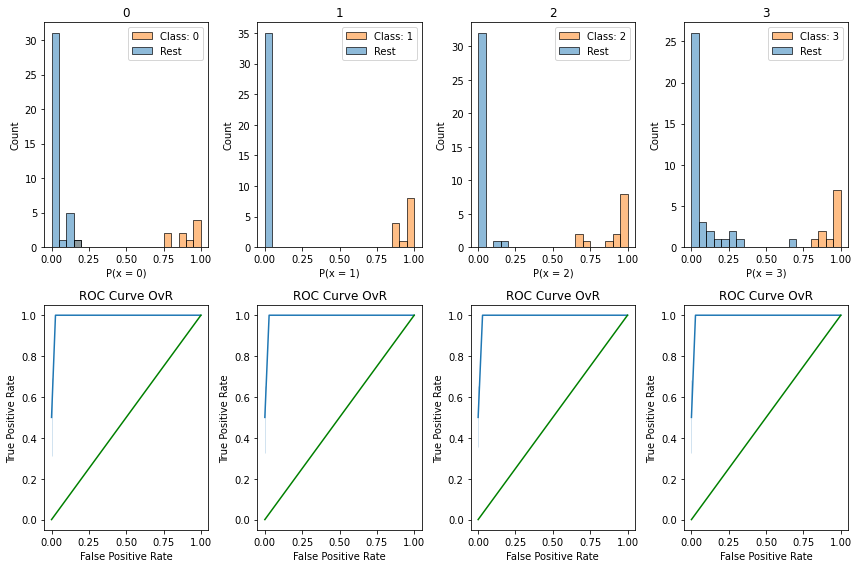

In [43]:
classes = model.classes_

plt.figure(figsize = (12, 8))
bins = [i/20 for i in range(20)] + [1]
roc_auc_ovr = {}

for i in range(len(classes)):
    c = classes[i]
    
    df_aux = X_Test.copy()
    df_aux['class'] = [1 if y == c else 0 for y in y_Test]
    df_aux['prob'] = pred_score[:, i]
    df_aux = df_aux.reset_index(drop = True)

    ax = plt.subplot(2, 4, i+1)
    sns.histplot(x = "prob", data = df_aux, hue = 'class', color = 'b', ax = ax, bins = bins)
    ax.set_title(c)
    ax.legend([f"Class: {c}", "Rest"])
    ax.set_xlabel(f"P(x = {c})")

    ax_bottom = plt.subplot(2, 4, i+5)
    tpr, fpr = get_all_roc_coordinates(df_aux['class'], df_aux['prob'])
    plot_roc_curve(tpr, fpr, scatter = False, ax = ax_bottom)
    ax_bottom.set_title("ROC Curve OvR")
    
    roc_auc_ovr[c] = roc_auc_score(df_aux['class'], df_aux['prob'])
    
plt.tight_layout()

In [44]:
avg_roc_auc = 0
i = 0
for k in roc_auc_ovr:
    avg_roc_auc += roc_auc_ovr[k]
    i += 1
    print(f"{k} ROC AUC OvR: {roc_auc_ovr[k]:.4f}")
print(f"average ROC AUC OvR: {avg_roc_auc/i:.4f}")

0 ROC AUC OvR: 1.0000
1 ROC AUC OvR: 1.0000
2 ROC AUC OvR: 1.0000
3 ROC AUC OvR: 1.0000
average ROC AUC OvR: 1.0000


In [45]:
roc_auc_score(y_Test, pred_score, labels = classes, multi_class = 'ovr', average = 'macro')

1.0

# Grid Search

In [63]:
mlp_gs = MLPClassifier(max_iter=100)

parameter_space = {
    'hidden_layer_sizes': [(10,30,10),(20,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}

clf = GridSearchCV(mlp_gs, parameter_space, n_jobs=-1, cv=5)
clf.fit(X_Train, y_Train)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


GridSearchCV(cv=5, estimator=MLPClassifier(max_iter=100), n_jobs=-1,
             param_grid={'activation': ['tanh', 'relu'],
                         'alpha': [0.0001, 0.05],
                         'hidden_layer_sizes': [(10, 30, 10), (20,)],
                         'learning_rate': ['constant', 'adaptive'],
                         'solver': ['sgd', 'adam']})

In [64]:
print('Best parameters found:\n', clf.best_params_)

Best parameters found:
 {'activation': 'tanh', 'alpha': 0.05, 'hidden_layer_sizes': (10, 30, 10), 'learning_rate': 'adaptive', 'solver': 'adam'}


# Best model

In [65]:
param_grid={'activation': 'tanh', 'alpha': 0.05, 'hidden_layer_sizes': (10, 30, 10), 'learning_rate': 'adaptive', 'solver': 'adam'}

In [70]:
best_model = MLPClassifier(param_grid)

In [69]:
best_model

MLPClassifier(hidden_layer_sizes={'activation': 'tanh', 'alpha': 0.05,
                                  'hidden_layer_sizes': (10, 30, 10),
                                  'learning_rate': 'adaptive',
                                  'solver': 'adam'})

In [71]:
best_model.fit(X_Train, y_Train)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


MLPClassifier()

In [72]:
predictions = best_model.predict(X_Test)

In [73]:
print(accuracy_score(y_Test, predictions))

1.0


In [74]:
print(classification_report(y_Test, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00        11
           3       1.00      1.00      1.00        15

    accuracy                           1.00        41
   macro avg       1.00      1.00      1.00        41
weighted avg       1.00      1.00      1.00        41

